# 1. Perkenalan


| # | Details |
| --- | --- |
| Name | Marwan Musa |
| Dataset | Bank Marketing Dataset on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) |
| Objective | Constructing **Classification Model** to predict if the product (bank term deposit) would be (`yes`) or not (`no`) subscribed. |

---

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


Penjelasan tiap-tiap fitur di dataset :


| Feature | Explanation |
| --- | --- |
| age | (numeric) |
| job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | 
| marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| education | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| default | has credit in default? (categorical: 'no','yes','unknown') |
| housing | has housing loan? (categorical: 'no','yes','unknown') |
| loan | has personal loan? (categorical: 'no','yes','unknown') |
| contact | contact communication type (categorical: 'cellular','telephone') |
| month | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |
| duration | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no') |
| campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client (numeric) |
| poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |
| emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| cons.price.idx | consumer price index - monthly indicator (numeric) |
| cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| euribor3m | euribor 3 month rate - daily indicator (numeric) |
| nr.employed | number of employees - quarterly indicator (numeric) |
| y | has the client subscribed a term deposit? (binary: 'yes','no') |




Pustaka : [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Penelitian terkait : <br>
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 <br>
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing : An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# For Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE 
from collections import Counter

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 3. Data Loading

In [2]:
# Data Loading & Data Head
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Data Tail

data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# Copy data original

data_copy = data.copy()

In [5]:
# Rename Columns

data.rename(columns={'y': 'subscribe'}, inplace=True)

# 4. Exploratory Data Analysis

### Cek Data Shape (Num of Rows and Columns) & Data Type

In [6]:
# Shape Data
print("Data Shape : ", data.shape)

Data Shape :  (41188, 21)


In [7]:
# Check Dataset columns type, missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset ini memiliki 41188 kolom dan 21 baris dengan varian tipe data float, integer dan object. Tidak terdapat missing values di setiap kolomnya. Selanjutnya akan di cek apakah ada kolom yang memiliki unvalid values(berdasarkan objective dari dataset yang telah dijelaskan sebelumnya di section *perkenalan*, terdapat value `unknown` di beberapa kolom), jika ada berapa persen? jika rasionya 30% atau kurang maka kita akan menghapus data tersebut.

### Cek Class Imbalance di Target Variable

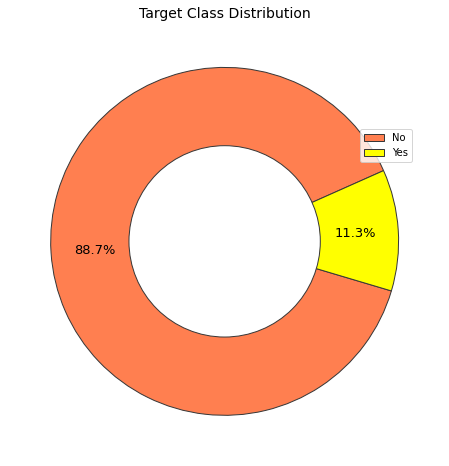

In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Color Setting
colors = ['coral', 'yellow']
tcolor_dict = {
    True : "coral",
    False : "y"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)
# Plot a pie chart to check if we have class imbalance problem
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(x = data["subscribe"].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":13},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
ax.set_title("Target Class Distribution", fontdict={'fontsize':14})
ax.legend(['No', 'Yes'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [9]:
data['subscribe'].groupby(data['subscribe']).count()

subscribe
no     36548
yes     4640
Name: subscribe, dtype: int64

Terdapat imbalance data di variabel target, yaitu klien tidak subscribe atau tidak deposit memiliki persentasi 88.7 persen dibandingkan klien yang akhirnya deposit sebanyak 11.3 persen. [/sourcecode-piechart](https://www.kaggle.com/code/junedism/spaceship-titanic-exploratory-data-analysis)

### Checking Unvalid Value in Categorical Variable

In [10]:
# Values tiap kategorikal variabel
for i in data.select_dtypes(include = 'object').columns :
    print(f"Unique values of {i} : {data[i].unique()}")
    print('---'*35)

Unique values of job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
---------------------------------------------------------------------------------------------------------
Unique values of marital : ['married' 'single' 'divorced' 'unknown']
---------------------------------------------------------------------------------------------------------
Unique values of education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
---------------------------------------------------------------------------------------------------------
Unique values of default : ['no' 'unknown' 'yes']
---------------------------------------------------------------------------------------------------------
Unique values of housing : ['no' 'yes' 'unknown']
------------------------------------------------------------------------------------------

Terdapat unvalid value `unknown` di beberapa kategorikal variabel. selanjutnya akan di cek berapa persen rasionya.

In [11]:
# Cek rasio unvalid values 'unknown'
# step -> ganti unknown ke nan values -> dropna -> hitung jumlah baris setalah dropna -> hitung perbandingan jumlah baris sebelum dan setelah dropna

a = ((data.shape[0] - data.replace('unknown', np.nan).dropna().shape[0])/data.shape[0])*100
print(f"Rasio jumlah baris dengan value 'unknown' terhadap banyak baris data keseluruhan : {round(a)} persen")

Rasio jumlah baris dengan value 'unknown' terhadap banyak baris data keseluruhan : 26 persen


Karena rasionya sebanyak 26% maka data tersebut akan dihapus (di `data preprocessing section`).

### Explore the Categorical Features

In [12]:
# Inisialisasi fitur kategorik
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['subscribe']))]

# length each feature
for feature in categorical_features:
    print('Fitur {} ini memiliki values kategori sebanyak {}'.format(feature,len(data[feature].unique())))

Fitur job ini memiliki values kategori sebanyak 12
Fitur marital ini memiliki values kategori sebanyak 4
Fitur education ini memiliki values kategori sebanyak 8
Fitur default ini memiliki values kategori sebanyak 3
Fitur housing ini memiliki values kategori sebanyak 3
Fitur loan ini memiliki values kategori sebanyak 3
Fitur contact ini memiliki values kategori sebanyak 2
Fitur month ini memiliki values kategori sebanyak 10
Fitur day_of_week ini memiliki values kategori sebanyak 5
Fitur poutcome ini memiliki values kategori sebanyak 3


- Terdapat 10 fitur kategorik
- Fitur `job` adalah fitur kategorik dengan varian value terbanyak kemudian `month` dan `education`.

### Categorical Features Distribution

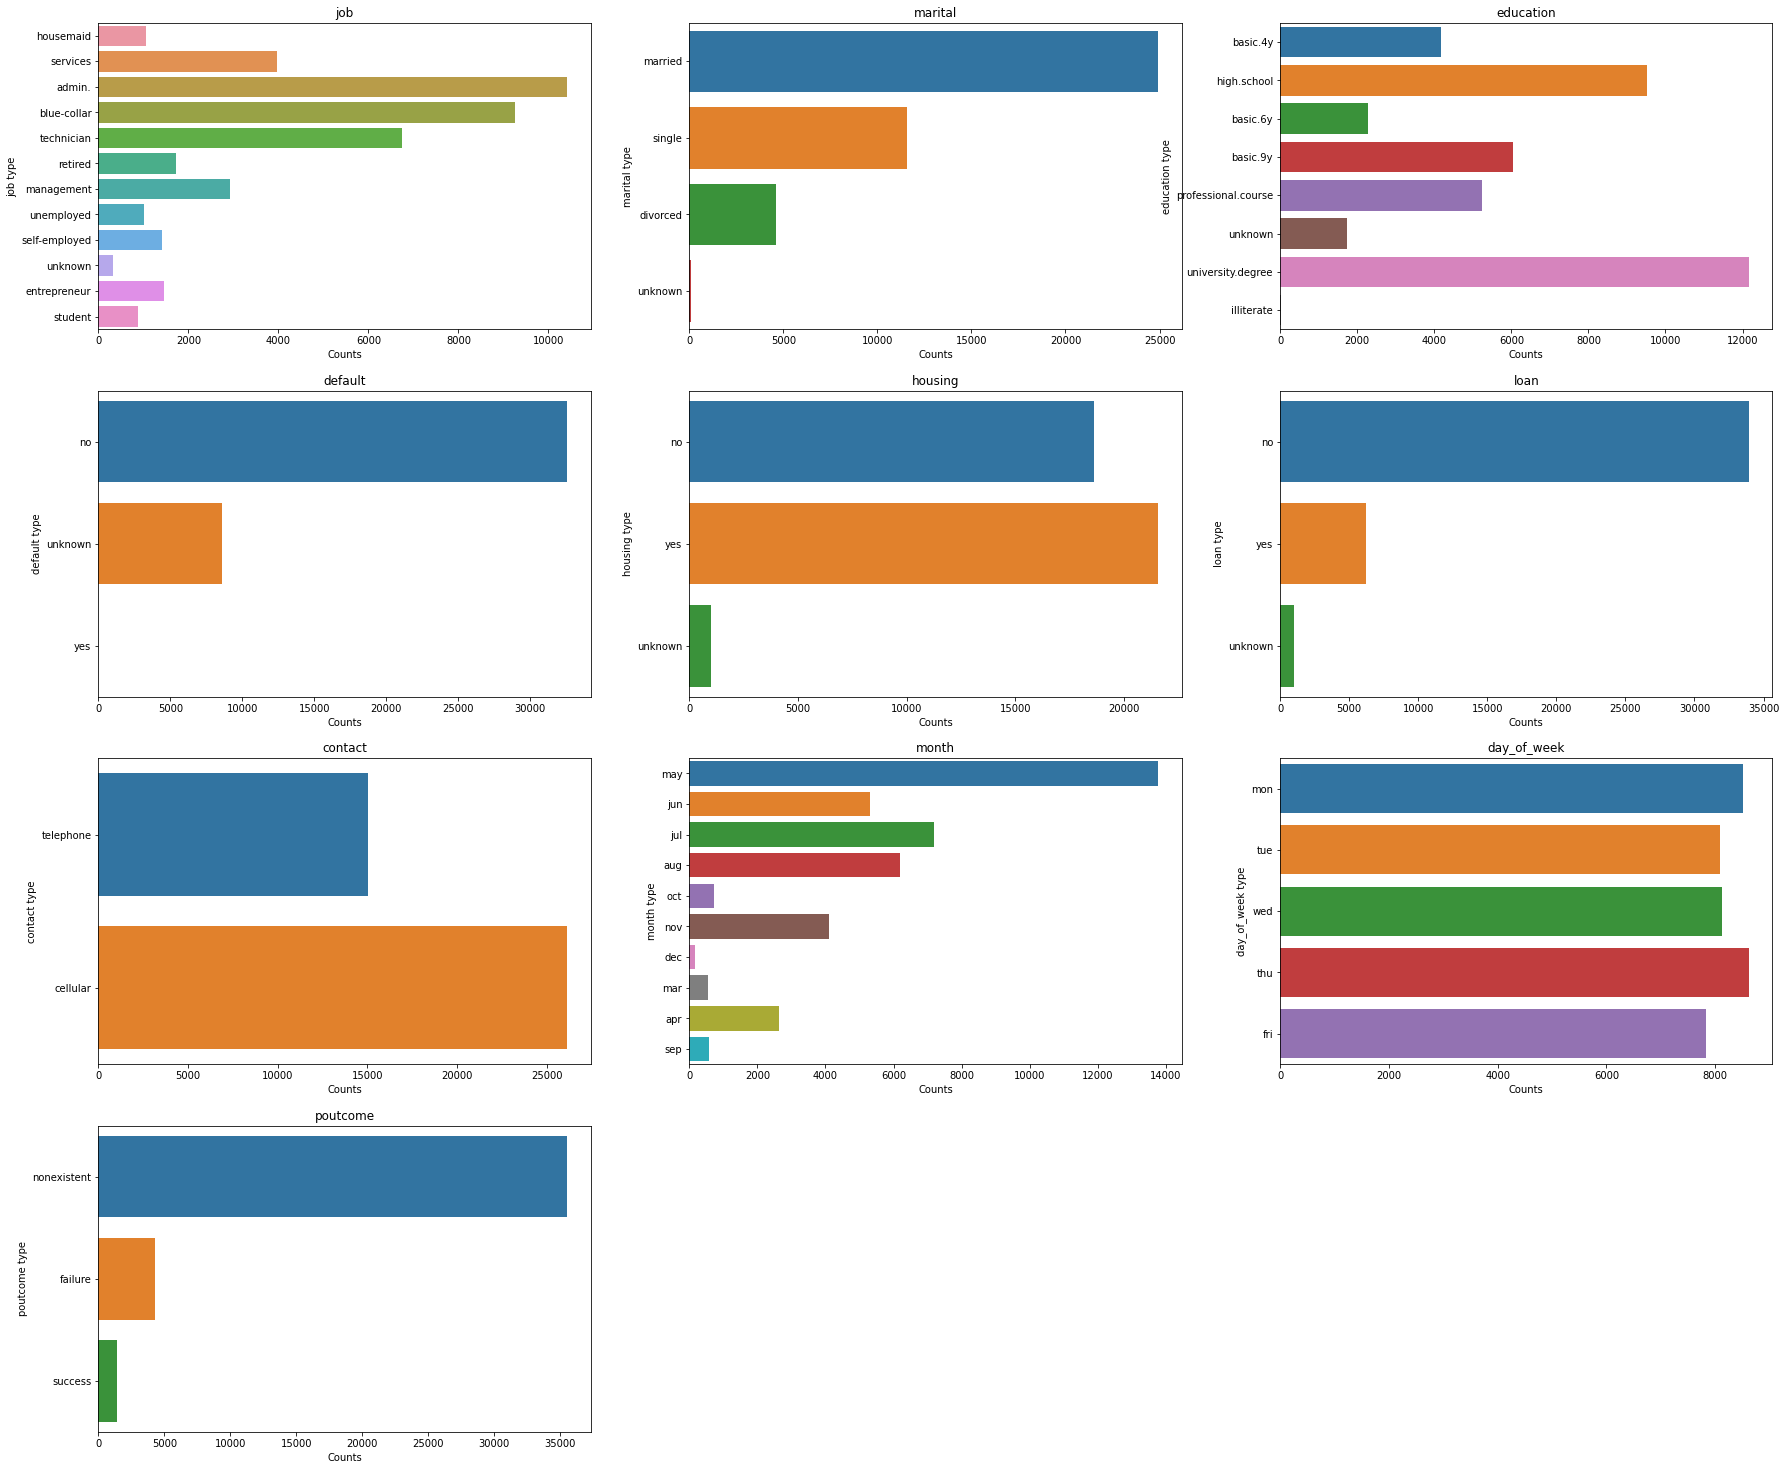

In [13]:
#check count based on categorical features
plt.figure(figsize = (30,80), facecolor = 'white')
iter = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12, 3, iter)
    sns.countplot(y = categorical_feature, data = data)
    plt.xlabel("Counts")
    plt.ylabel(f"{categorical_feature} type")
    plt.title(categorical_feature)
    iter += 1
plt.show()

- Klien dengan pekerjaan di bagian `admin` adalah yang terbanyak sedangkan `housemaid` memiliki data paling sedikit
- Sebagian besar klien bank status pernikahannya `married`
- Level edukasi tertinggi adalah `University Degree` dan terendah `illiterate` atau buta huruf.
- Metode marketing sebagian besar dilakukan by `cellular` dibandingkan by `telephone`
- Karena sebagian besar klien tidak default (jumlah 32588) sedangkan klien default (jumlah 3) sangat sedikit, maka bisa diasumsikan fitur `default` ini akan memiliki nilai `feature importances` mendekati 0 atau tidak akan memberikan dampak yang signifikan dalam analisis lanjutan untuk case ini.
- Data bulan may adalah yang paling banyak data desember yang paling sedikit.
- Untuk data mingguan, senin dan kamis memiliki data paling banyak sedangkan jumat yang paling sedikit.

### Explore the Numerical Features

In [14]:
# list of numerical variables
numerical_features = data.select_dtypes(exclude='object').columns
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Dalam dataset yang digunakan terdapat 10 numerik fitur.

### Numerical Features Distribution and Anomaly

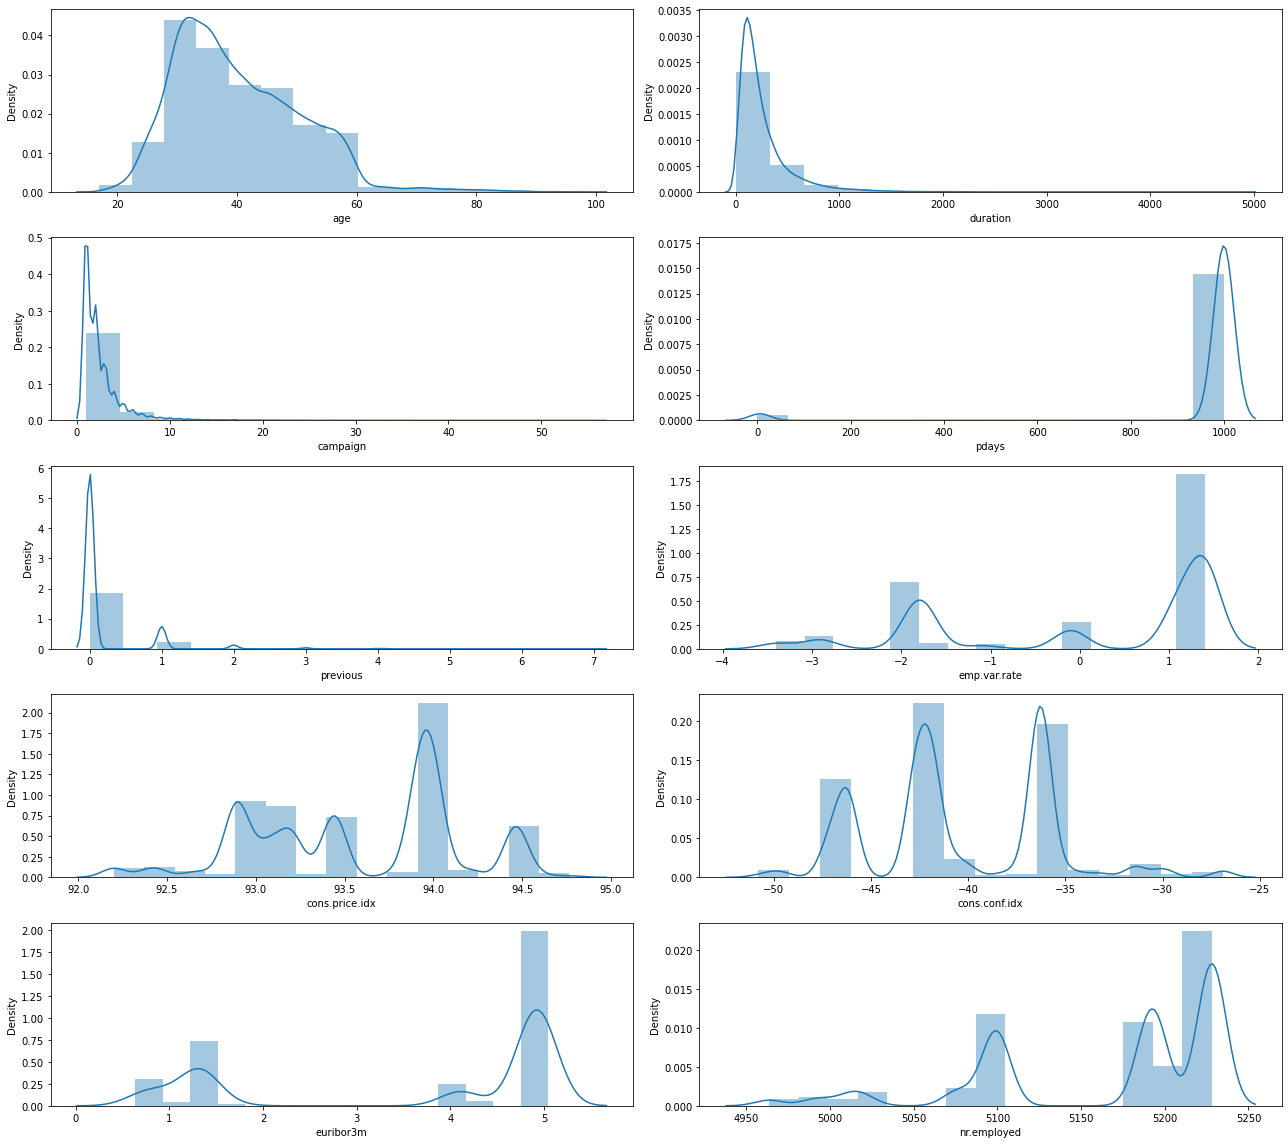

In [15]:
# Visualizing data distribution with distplot 
x = plt.figure(figsize=(18, 16))

for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.distplot(data[j], bins=15)
    x.tight_layout()

plt.tight_layout()

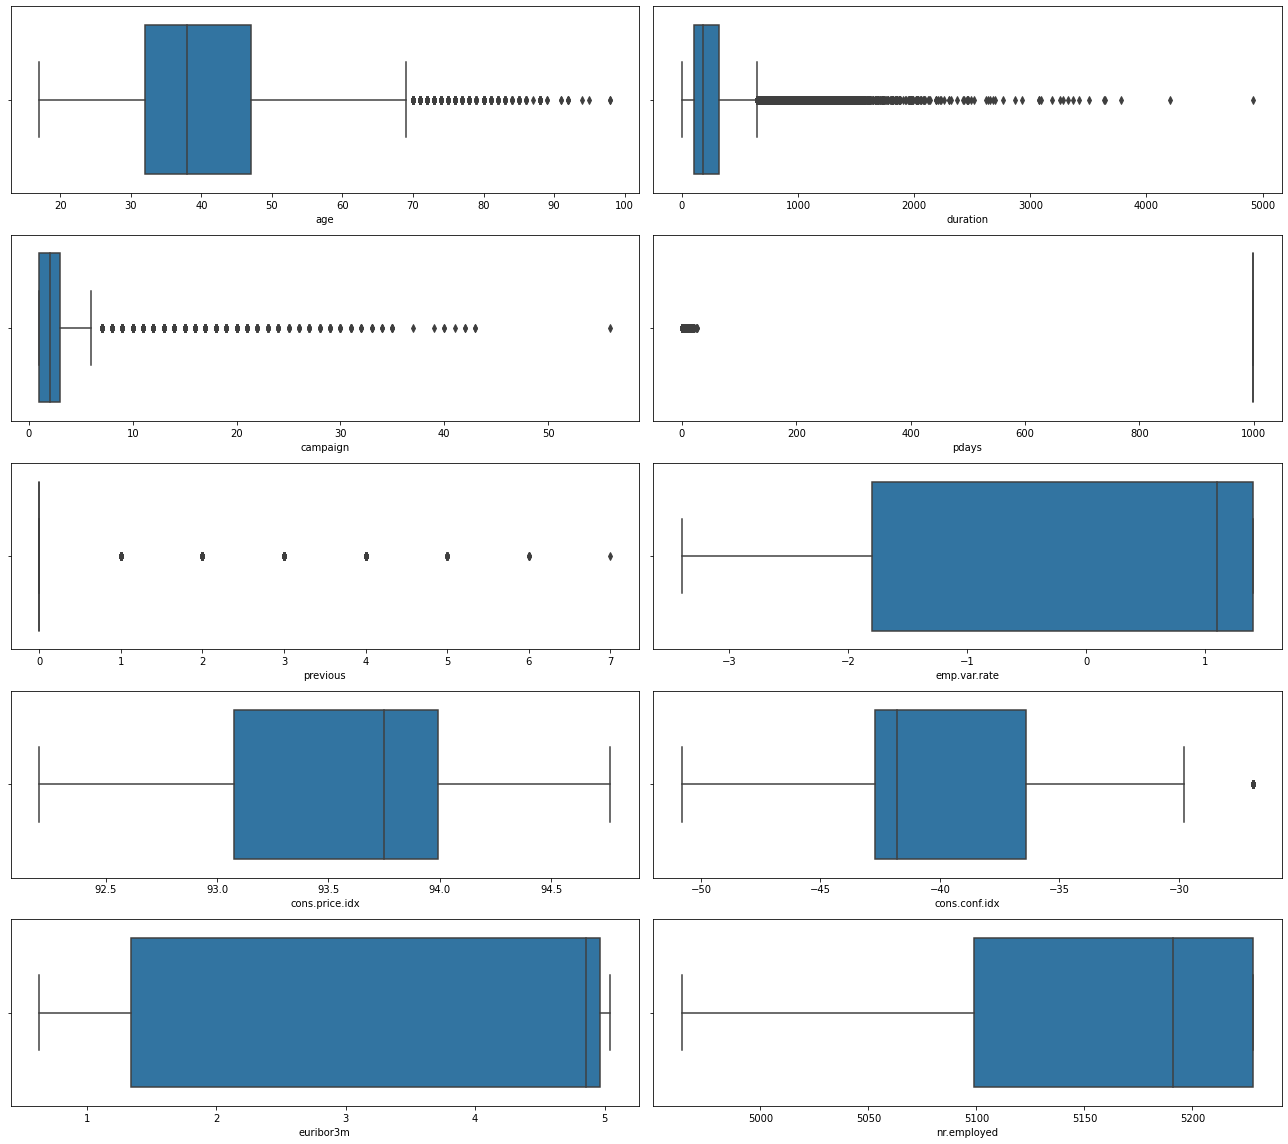

In [16]:
# Visualizing data distribution with boxplot // checking outliers
x = plt.figure(figsize=(18, 16))
for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(data[j])
    x.tight_layout()
plt.tight_layout()

- Variabel `duration`, `campaign`, dan `previous` sepertinya memiliki persebaran data yang sama. Selanjutnya `emp.var.rate` dan `euribor3m` juga memiliki kemiripan, seperti halnya variabel`cons.price.idx` dan `cons.conf.idx`.
- Terdapat outliers di `age`, `duration`, `campaign`, `pdays`, `previous`, dan `cons.conf.idx`.

###  Relation between Numerical Features and Target Feature

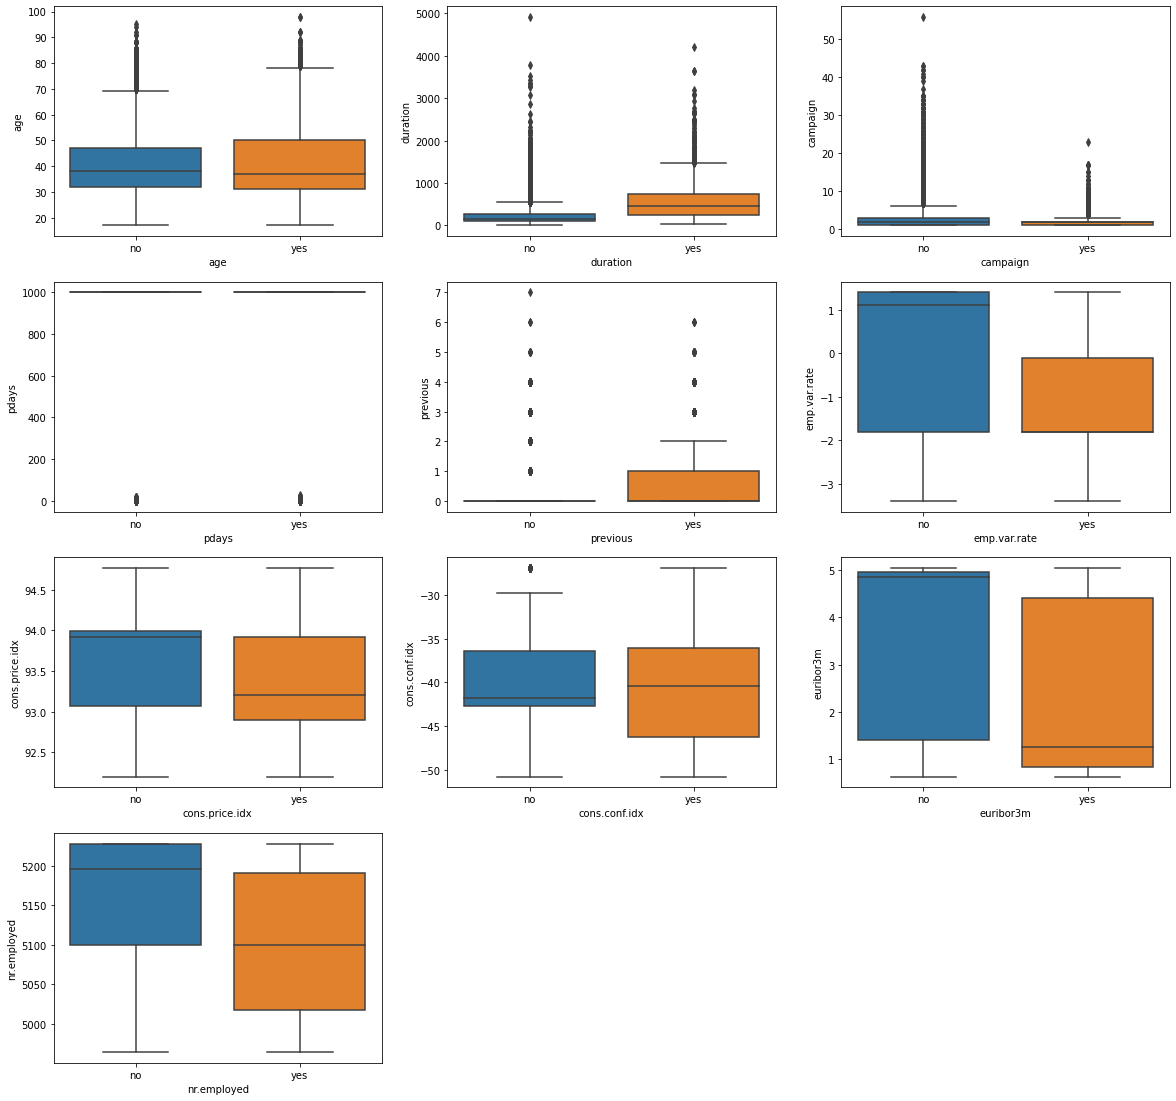

In [17]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = "subscribe", y = data[feature], data = data)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

- Lebih banyak klien yang deposit dengan durasi kontak lebih lama.
- Campaign atau seberapa banyak pihak bank menghubungi klien itu berbanding terbalik dengan visi marketing yaitu menarik nasabah atau klien untuk deposit. Banyak campaign yang kurang berhasil jika dilihat dari banyaknya klien yang tidak deposit daripada klien deposit.

### Correlation between Numerical Features

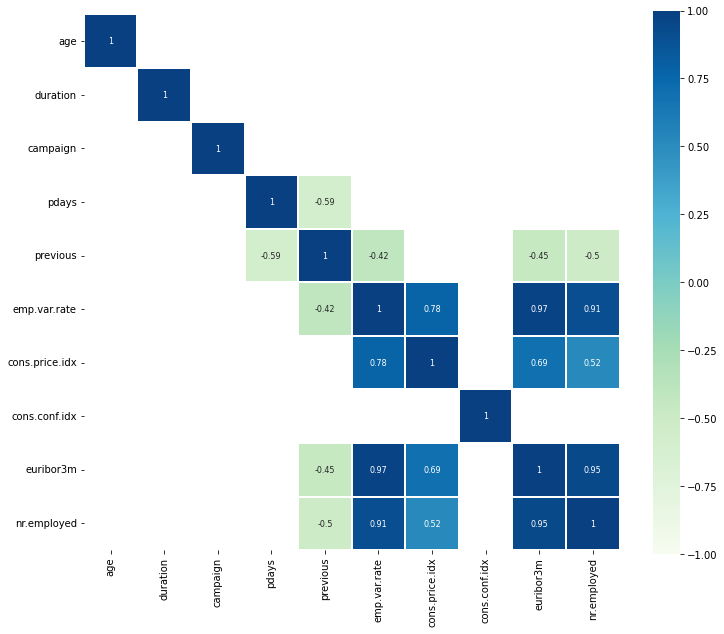

In [18]:
# Checking for correlation by heatmap
corr = data[numerical_features].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='GnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- `pdays` berkorelasi dengan `previous`
- `previous` juga berkorelasi dengan `emp.var.rate`, `euribor3m`, dan `nr.employed`.
- `emp.var.rate` sangat berkorelasi dengan `cons.price.idx`, `euribor3m`, dan `nr.employed`.
- `cons.price.idx` cukup berkorelasi dengan `euribor3m`, dan `nr.employed`
- `euribor3m` sangat berkorelasi dengan `nr.employed`


# 5. Data Preprocessing

## *Get Data for Model Inference*

Sebelum melakukan feature engineering, kita telah memperoleh bahwa terdapat unvalid value `unknown` dengan tingkat persentasi hanya 25%, jadi kita akan melakukan dropping value `unknown` tersebut sebelum data dipisah untuk train test dan inference.

In [19]:
# dropping unvalid value

data = data.replace("unknown", np.nan) # replacing "unknown" with NaN
data.dropna(inplace = True) # drop all nan values

In [20]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state = 0)

In [21]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

In [22]:
# Reset Index

data_train_test.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop = True, inplace = True)

## *Splitting Dataset*

In [23]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('subscribe', axis = 1)
y = data_train_test['subscribe']

In [24]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =  0)

print('test Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

test Size :  (24382, 20)
Test Size :  (6096, 20)


## *Feature Selection*

Summary berdasarkan eksplorasi data di EDA section untuk pertimbangan pemilihan fitur:

- Karena sebagian besar klien tidak default (jumlah 32588) sedangkan klien default (jumlah 3) sangat sedikit, maka bisa diasumsikan fitur `default` ini tidak akan memberikan dampak yang signifikan dalam analisis lanjutan untuk case ini karena hampir seluruh data terkluster di class `no default`.

- `pdays` berkorelasi dengan `previous`
- `previous` juga berkorelasi dengan `emp.var.rate`, `euribor3m`, dan `nr.employed`.
- `emp.var.rate` sangat berkorelasi dengan `cons.price.idx`, `euribor3m`, dan `nr.employed`.
- `cons.price.idx` cukup berkorelasi dengan `euribor3m`, dan `nr.employed`
- `euribor3m` sangat berkorelasi dengan `nr.employed`

Berdasarkan summary di atas, kita akan drop variabels `default`(untuk fitur kategorik), `pdays`, `emp.var.rate`, `nr.employed`, `euribor3m`, dan `nr.employed`.
Mungkin akan muncul pertanyaan mengapa lebih memilih `pdays` untuk di drop daripada `previous`? Karena, untuk variabel `pdays` distibusi untuk klien deposit dan tidak deposit hampir sama jumlahnya. Sedangkan untuk variabel `emp.var.rate`, `nr.employed`, `euribor3m`, dan `nr.employed`, keempat variabel tersebut sangat berhubungan dengan variabel `cons.price.idx`.

In [25]:
# Choosing columns for modeling

X_train = X_train[['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'previous', 'poutcome', 'cons.price.idx']]
X_test = X_test[['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'previous', 'poutcome', 'cons.price.idx']]

## *Handling Missing Values*

In [26]:
# Check Missing Values on X_train

X_train.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
dtype: int64

In [27]:
# Check Missing Values on X_test

X_test.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
dtype: int64

In [28]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [29]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

## *Handling Outlier*

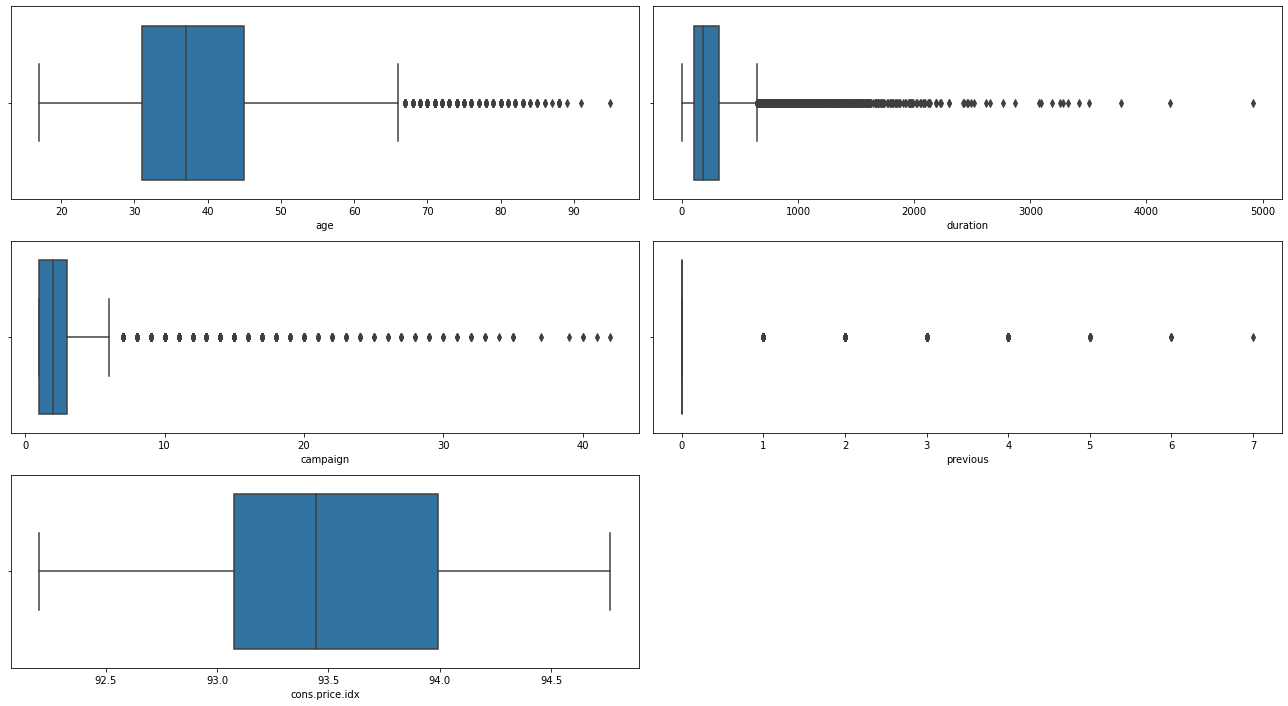

In [30]:
# Boxploting every feature on X_train to see outlier (Before Handling)

x = plt.figure(figsize=(18, 16))
for i, j in enumerate(X_train.select_dtypes(exclude='object').columns):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(X_train[j])
    x.tight_layout()
plt.tight_layout()

variabel `age`, `duration`, dan `previous` tidak akan dilakukan handling outliers karena value `age` adalah value natural, untuk `duration` semakin lama durasi marketing semakin tertarik nasabah atau klien untuk deposit, `previous` phone calls marketing sebelum last campaign juga sangat berpengaruh dalam kesuksesan campaign.

In [31]:
# Check if the data have normal distribution for each numerical column on X_train
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

normaldist_columns = []
nonnormaldist_columns = []

for i in X_train.select_dtypes(exclude='object').columns:
    g = X_train[i].skew()
    normaldist_columns.append(i) if g <= 0.5 and g >= -0.5 else nonnormaldist_columns.append(i)
    
print('Number of normal distribution data ',len(normaldist_columns))
print('Number of nonnormal distribution data ',len(nonnormaldist_columns))
print('Columns with normal distribution on X_train : ', normaldist_columns)
print('Columns with non - normal distribution on X_train : ', nonnormaldist_columns)

Number of normal distribution data  1
Number of nonnormal distribution data  4
Columns with normal distribution on X_train :  ['cons.price.idx']
Columns with non - normal distribution on X_train :  ['age', 'duration', 'campaign', 'previous']


terlihat bahwa terdapat 1 variabel dengan approximately normal distributed yaitu `cons.price.idx` untuk variabel numerik lainnya terdistribusi skew.

In [32]:
# Define Z-score function to handling outliers in normal distribution data
def tukeys_method(df, variable):
    
    # Input : dataframe & column name
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    batas = 3*iqr
    
    batas_bb = q1 - batas # lower bound
    batas_ba = q3 + batas # upper bound
    ol = [] # empty list to append outlier x  
    for x in (df[variable]):
        if x <= batas_bb or x >= batas_ba:
            ol.append(x)
    return ol

disini saya memakai fold iqr = 3 agar tidak terlalu banyak data yang dihilangkan.

In [33]:
# Collecting outliers

outliers = tukeys_method(X_train, 'campaign')       # We use tukeys method because campaign have nonnormal distribution
len(outliers)

776

In [34]:
# Get index of outliers in data

outl_index = X_train[X_train['campaign'].isin(outliers)].index

In [35]:
# Deleting outliers from data

X_train = X_train[~X_train['campaign'].isin(outliers)]

In [36]:
# Drop rows on y_train based on index of all outliers

y_train.drop(outl_index, inplace=True)

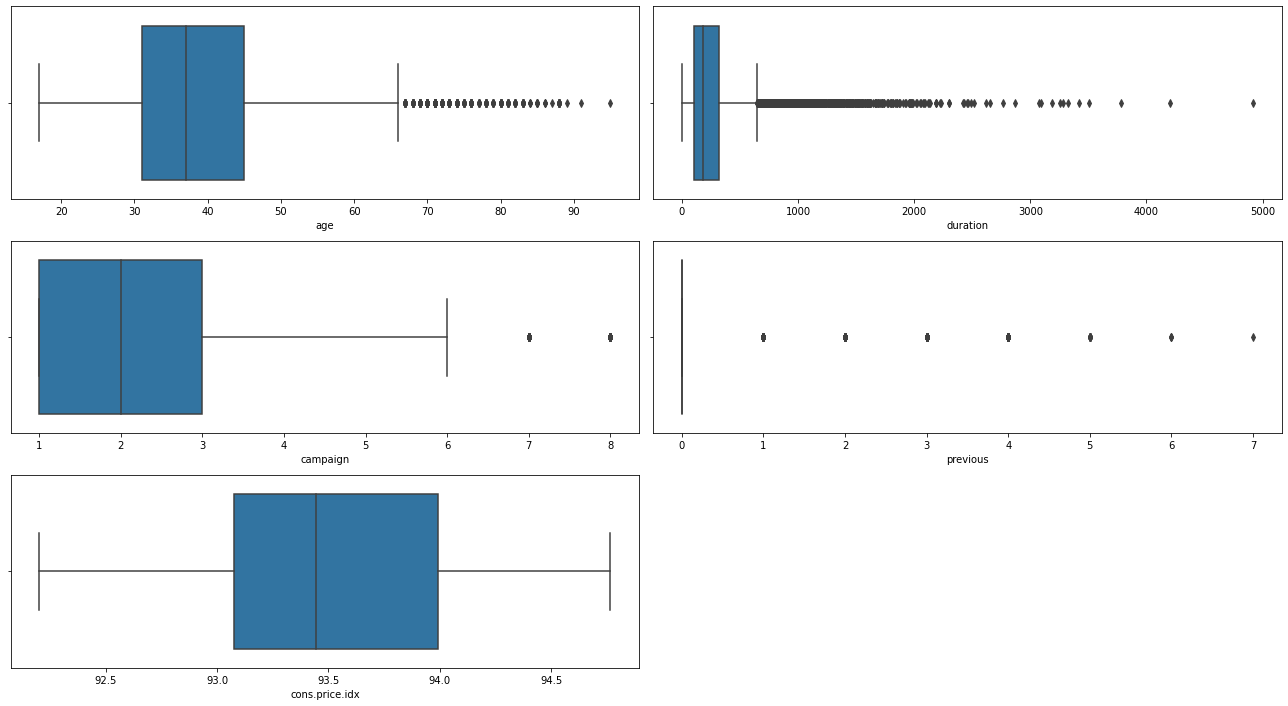

In [37]:
# Boxploting every feature on X_train to see outlier (After Handling)
x = plt.figure(figsize=(18, 16))
for i, j in enumerate(X_train.select_dtypes(exclude='object').columns):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(X_train[j])
    x.tight_layout()
plt.tight_layout()

outliers di variabel `campaign` sudah berkurang setelah di handling.

## *Split between nominal and ordinal Categorical Columns*

In [38]:
# Splitting ordinal and nominal values
ordcat = ['education']
ohecat = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

## *Target Encoding*

In [39]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [40]:
# Encode the target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

## *Model Definition*

Task Modelling (Rubrik) : **Membuat model dengan kasus yang dipilih dengan Scikit-Learn (minimal 4 algoritma berbeda)**

kali ini akan dipilih 4 model yaitu **Logistic Regression**, **Decision Tree**, **KNN** dan **GaussianNB**, namun akan langsung dicari model (dengan parameter default) yang memberikan cross validation score terbaik. Selanjutnya model terbaik tadi, akan dilakukan hyperparameter tuning dengan munggunakan grid search.

### Cross Validation Results each Model (with default parameters)

In [41]:
# Scaling and Encoding data 
scale_n_encode = ColumnTransformer([('standard', StandardScaler(), normaldist_columns),
                                  ('minmax', MinMaxScaler(), nonnormaldist_columns),
                                  ('ordinal', OrdinalEncoder(categories= [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course']]), ordcat),
                                  ('nominal', OneHotEncoder(), ohecat)])

# Mencari nilai cross validation terbaik untuk setiap model
pipe1 = Pipeline([('preprocessing', scale_n_encode),
                 ('model', LogisticRegression(random_state = 0))])
pipe2 = Pipeline([('preprocessing', scale_n_encode),
                 ('model', DecisionTreeClassifier(random_state = 0))]) 
pipe3 = Pipeline([('preprocessing', scale_n_encode),
                 ('model', KNeighborsClassifier())]) 
pipe4 = Pipeline([('preprocessing', scale_n_encode),
                 ('model', GaussianNB())])

#train all models
pipe1.fit(X_train, y_train_enc)
pipe2.fit(X_train, y_train_enc)
pipe3.fit(X_train, y_train_enc)
pipe4.fit(X_train, y_train_enc)  

# initialize list of lists cross validation scores
dfcrsval_raw = [['Logistic Regression', cross_val_score(pipe1, X_train, y_train_enc, cv=5).mean(), cross_val_score(pipe1, X_train, y_train_enc, cv=5).std()],
         ['SVM', cross_val_score(pipe2, X_train, y_train_enc, cv=5).mean(), cross_val_score(pipe2, X_train, y_train_enc, cv=5).std()],
         ['Decission Tree', cross_val_score(pipe3, X_train, y_train_enc, cv=5).mean(), cross_val_score(pipe3, X_train, y_train_enc, cv=5).std()],
         ['Random Forest', cross_val_score(pipe4, X_train, y_train_enc, cv=5).mean(), cross_val_score(pipe4, X_train, y_train_enc, cv=5).std()]]

# Create the pandas DataFrame
dfcrsval = pd.DataFrame(dfcrsval_raw, columns=['Model', 'Cross-Val Score', 'Std'])
 
# print dataframe of ROC-AUC scores all models
dfcrsval

,Model,Cross-Val Score,Std
0,Logistic Regression,0.891341,0.002723
1,SVM,0.868423,0.005657
2,Decission Tree,0.872617,0.002304
3,Random Forest,0.849784,0.003932


Diperoleh model dengan cross-val terbaik yaitu ***Logistic Regression***, selanjutnya akan dilakukan hyperparameter tuning untuk model ini.

### Hyperparameter Tuning Best Model

Sebelum finalisasi model definition, kita akan mencari dulu parameter terbaik berdasarkan gridsearch untuk Logreg model yang akan dipakai.

In [42]:
# Scaling and Encoding data X_train
X_train_final = scale_n_encode.fit_transform(X_train)

# Membuat param grid
model = LogisticRegression(random_state = 0)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Grid Search
param_grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(X_train_final, y_train_enc)

In [43]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892442 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.892358 (0.003594) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.892386 (0.003622) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.892358 (0.003594) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.892315 (0.003503) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892273 (0.003555) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892315 (0.003503) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'li

Berdasarkan gridsearch, diperoleh parameter terbaik untuk model adalah 
```python
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
```

### Model Definition with the Best Parameters

In [44]:
# Defining the model with best parameters
pipe = Pipeline([('preprocessing', scale_n_encode),
                 ('model', LogisticRegression(C = 1.0, penalty = 'l1', solver = 'liblinear', random_state  = 0))])

## *Model Training*

In [45]:
# Train the Model 
pipe.fit(X_train, y_train_enc)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['cons.price.idx']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'previous']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('model',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='liblinear'))])

## *Model Evaluation*

### *Accuracy and ROC-AUC*

In [46]:
# Predict against Train-Set and Test-Set & print accuracy scores
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Accuracy score
accdata = pd.DataFrame([['Accuracy', accuracy_score(y_train_enc, y_pred_train), accuracy_score(y_test_enc, y_pred_test)],
                        ['ROC-AUC', roc_auc_score(y_train_enc, y_pred_train), roc_auc_score(y_test_enc, y_pred_test)]],
                       columns = [['Metrics', 'Train Set', 'Test Set']])
accdata

,Metrics,Train Set,Test Set
0,Accuracy,0.892909,0.897310
1,ROC-AUC,0.667908,0.666273


Berdasarkan accuracy score, model ini cukup bagus karena accuracy nya yang cukup tinggi dan model memprediksi sedikit lebih baik di test set. Namun ROC-AUC score hanya berkisar `66%` di train dan test set. Selanjutnya performansi model akan di analisis berdasarkan classification report.

### *Classification Report*

In [47]:
# SVM Model Classification report for train and test set

print("LogReg Model Classification Report for train set:\n", classification_report(y_train_enc, y_pred_train))
print("LogReg Model Classification Report for test set:\n", classification_report(y_test_enc, y_pred_test))

LogReg Model Classification Report for train set:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     20555
           1       0.65      0.36      0.47      3051

    accuracy                           0.89     23606
   macro avg       0.78      0.67      0.70     23606
weighted avg       0.88      0.89      0.88     23606

LogReg Model Classification Report for test set:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5326
           1       0.68      0.36      0.47       770

    accuracy                           0.90      6096
   macro avg       0.80      0.67      0.71      6096
weighted avg       0.88      0.90      0.88      6096



Recall description :


| Recall train set (class 0) | Recall train set (class 1) | Recall test set (class 0)| Recall test set (class 1)|
| --- | --- | --- | --- |
| 0.97 | 0.36 | 0.98 | 0.36 |


Nilai Recall di kedua kelas target sangat jauh berbeda, hal ini terjadi karena ada imbalanced class di variabel target. 
Nilai recall untuk class 0 (tidak deposit) adalah `97%` di train set artinya model memprediksi klien tidak deposit dengan rasio `97%` terhadap jumlah klien tidak deposit terprediksi tidak deposit dan klien tidak deposit terprediksi deposit, sedangkan nilai recall untuk class 1 (deposit) adalah `36%` di train set artinya model memprediksi klien deposit dengan rasio `36%` terhadap jumlah klien deposit terprediksi deposit dan klien deposit terprediksi tidak deposit. Selanjutnya untuk rasio nilai recall di test set hampir sama dengan train set. <br>
Apakah dengan membuat data menjadi balance akan mengubah nilai accuracy ? Mari kita coba. (Resampling sudah pasti mengubah nilai recall)

## Model Evaluation on Resampling Data

In [48]:
# Cek jumlah class di var target sebelum smote
print('Original dataset shape %s' % Counter(y_train_enc))

Original dataset shape Counter({0: 20555, 1: 3051})


Jumlah tiap class sebelum resampling 20555 banding 3051.

In [49]:
# Rebalancing
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_final, y_train_enc)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 20555, 0: 20555})


Setelah resampling jumlah class target sama yaitu 20555.

### *Accuracy and ROC-AUC*

In [50]:
# transform X_test terlebih dahulu
X_test_ct = scale_n_encode.fit_transform(X_test)

# Define the model
pipe_res = Pipeline([('model', LogisticRegression(C = 1.0, penalty = 'l1', solver = 'liblinear', random_state  = 0))])
# Train the Model 
pipe_res.fit(X_res, y_res)

# Predict against Train-Set and Test-Set & print accuracy scores
y_res_pred_train = pipe_res.predict(X_res)
y_res_pred_test = pipe_res.predict(X_test_ct)

# Accuracy score
accdata_res = pd.DataFrame([['Accuracy after Rebalancing', accuracy_score(y_res, y_res_pred_train), accuracy_score(y_test_enc, y_res_pred_test)],
                        ['ROC-AUC after Rebalancing', roc_auc_score(y_res, y_res_pred_train), roc_auc_score(y_test_enc, y_res_pred_test)]],
                       columns = [['Metrics', 'Train Set', 'Test Set']])
accdata_res

,Metrics,Train Set,Test Set
0,Accuracy after Rebalancing,0.85495,0.790682
1,ROC-AUC after Rebalancing,0.85495,0.837439


Accuracy score original data yang sebelumnya `89%` baik di train maupun di test set setelah resampling turun menjadi `85%` di train dan `79%` di test set. Sebaliknya, untuk ROC-AUC score naik menjadi sekitar `84%` untuk train dan test set di resampled data.

### *Classification Report*

In [51]:
# Classification report after balancing
print("LogReg Model Classification Report for train set:\n", classification_report(y_res, y_res_pred_train))
print("LogReg Model Classification Report for test set:\n", classification_report(y_test_enc, y_res_pred_test))

LogReg Model Classification Report for train set:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85     20555
           1       0.85      0.86      0.85     20555

    accuracy                           0.85     41110
   macro avg       0.85      0.85      0.85     41110
weighted avg       0.85      0.85      0.85     41110

LogReg Model Classification Report for test set:
               precision    recall  f1-score   support

           0       0.98      0.77      0.87      5326
           1       0.37      0.90      0.52       770

    accuracy                           0.79      6096
   macro avg       0.67      0.84      0.69      6096
weighted avg       0.90      0.79      0.82      6096



Recall description :


| Perlakuan | Recall train set (class 0) | Recall train set (class 1) | Recall test set (class 0)| Recall test set (class 1)|
| --- | --- | --- | --- | --- |
| Sebelum rebalance | 0.97 | 0.36 | 0.98 | 0.36 |
| Setelah rebalance | 0.85 | 0.86 | 0.77 | 0.90 |


Nilai Recall di kedua kelas target sudah lebih baik dari sebelumnya, hal ini terjadi karena data  di variabel target sudah di balancing. 
Nilai recall untuk class 0 (tidak deposit) adalah `85%` di train set artinya model memprediksi klien tidak deposit dengan rasio `85%` terhadap jumlah klien tidak deposit terprediksi tidak deposit dan klien tidak deposit terprediksi deposit, sedangkan nilai recall untuk class 1 (deposit) hampir sama dengan class 0 yaitu `86%` di train set artinya model memprediksi klien deposit dengan rasio `86%` terhadap jumlah klien deposit terprediksi deposit dan klien deposit terprediksi tidak deposit. Selanjutnya untuk rasio nilai recall di test set naik secara drastis untuk class 1 dari recall value sebelum di balancing yaitu dari `36%` menjadi `90%`, namun terjadi `overfitting` recall karena nilai recall ditest set lebih besar dari train set dengan perbedaan nilai `13%`. <br>
Namun, ini secara tidak langsung, sesuai dengan visi company untuk lebih banyak mengusahakan banyak nasabah yang deposit (class 1) melalui pendeteksian behavior marketing yang sesuai dengan model yang diperoleh.

## *Model Inference*

In [52]:
# Display Inference-Set

data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,37,services,single,basic.9y,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
1,53,retired,married,high.school,no,yes,no,cellular,jul,fri,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,31,technician,married,university.degree,no,no,no,cellular,sep,thu,...,1,3,1,success,-1.1,94.199,-37.5,0.878,4963.6,yes
3,29,entrepreneur,single,professional.course,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,49,services,divorced,basic.9y,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5,70,retired,divorced,high.school,no,yes,no,telephone,may,wed,...,2,4,2,success,-1.8,93.876,-40.0,0.697,5008.7,yes
6,30,admin.,single,high.school,no,yes,no,cellular,may,thu,...,8,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
7,40,self-employed,single,university.degree,no,yes,no,cellular,jul,wed,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
8,46,technician,divorced,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
9,50,entrepreneur,married,basic.9y,no,yes,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [53]:
# Feature select
data_inf_final = data_inf[['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'previous', 'poutcome', 'cons.price.idx']]

# Predicting
y_pred_inf = pipe.predict(data_inf_final)

# Concate between Inference-Set and Prediction
data_inf_final = pd.concat([data_inf, pd.DataFrame(y_pred_inf, columns=['Prediction'])], axis=1)
data_inf_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,Prediction
0,37,services,single,basic.9y,no,no,no,cellular,may,tue,...,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no,0
1,53,retired,married,high.school,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0
2,31,technician,married,university.degree,no,no,no,cellular,sep,thu,...,3,1,success,-1.1,94.199,-37.5,0.878,4963.6,yes,1
3,29,entrepreneur,single,professional.course,no,no,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
4,49,services,divorced,basic.9y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0
5,70,retired,divorced,high.school,no,yes,no,telephone,may,wed,...,4,2,success,-1.8,93.876,-40.0,0.697,5008.7,yes,1
6,30,admin.,single,high.school,no,yes,no,cellular,may,thu,...,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no,0
7,40,self-employed,single,university.degree,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,1
8,46,technician,divorced,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,0
9,50,entrepreneur,married,basic.9y,no,yes,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


## *Kesimpulan*

Untuk projek kali ini dataset yang digunakan adalah `Bank Marketing Dataset` dimana kita membuat model yang bisa meng-*classify* nasabah / klien akan deposit atau tidak berdasarkan marketing strategy yang dilakukan.

Sumber dataset : [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Dataset ini memiliki 41188 baris dan 21 kolom / variabel dengan varian tipe data float, integer dan object. Tidak terdapat missing values di setiap kolomnya, namun terdapat unvalid value `unknown` yang selanjutnya telah dihapus di preprocessing data. 

Banyak fakta-fakta menarik yang kami peroleh saat mengeksplorasi dataset ini diantaranya :
- Terdapat imbalance data di variabel target, yaitu klien tidak subscribe atau tidak deposit memiliki persentasi 88.7 persen dibandingkan klien yang akhirnya deposit sebanyak 11.3 persen.
- Klien dengan pekerjaan di bagian `admin` adalah yang terbanyak sedangkan `housemaid` memiliki data paling sedikit
- Sebagian besar klien bank status pernikahannya `married`
- Level edukasi tertinggi adalah `University Degree` dan terendah `illiterate` atau buta huruf.
- Metode marketing sebagian besar dilakukan by `cellular` dibandingkan by `telephone`
- Karena sebagian besar klien tidak default (jumlah 32588) sedangkan klien default (jumlah 3) sangat sedikit, maka bisa diasumsikan fitur `default` ini akan memiliki nilai `feature importances` mendekati 0 atau tidak akan memberikan dampak yang signifikan dalam analisis lanjutan untuk case ini.
- Data bulan may adalah yang paling banyak data desember yang paling sedikit.
- Untuk data mingguan, senin dan kamis memiliki data paling banyak sedangkan jumat yang paling sedikit.
- Variabel `duration`, `campaign`, dan `previous` sepertinya memiliki persebaran data yang sama. Selanjutnya `emp.var.rate` dan `euribor3m` juga memiliki kemiripan, seperti halnya variabel `cons.price.idx` dan `cons.conf.idx`.
- Terdapat outliers di `age`, `duration`, `campaign`, `pdays`, `previous`, dan `cons.conf.idx`.
- Lebih banyak klien yang deposit dengan durasi kontak lebih lama.
- Campaign atau seberapa banyak pihak bank menghubungi klien itu berbanding terbalik dengan visi marketing yaitu menarik nasabah atau klien untuk deposit. Banyak campaign yang kurang berhasil jika dilihat dari banyaknya klien yang tidak deposit daripada klien deposit.
- Banyak fitur-fitur numerik yang berkorelasi tinggi berdasarkan heatmap correlation.
- dan mungkin masih banyak lagi fakta-fakta menarik yang bisa diekxplor lebih lanjut.

Setelah itu dilakukan preprocessing dataset berdasarkan temuan eksplorasi di atas kemudian memilih fitur-fitur penting (important features) untuk modelling.

Untuk project kali ini kami menggunakan Model ***Logistic Regression Classifier*** karena base model ini (model dengan default parameter) memberikan nilai cross validation terbaik dibandingkan 3 model pilihan lainnya yaitu ***Decission Tree***, ***KNN*** dan ***Gaussian NB***. Performansi Model `cukup baik` berdasarkan **accuracy** sekitar `90%` baik di train set dan test set, hal ini terjadi karena (mungkin) sebelum training model, kami mencari best parameter untuk model Logreg yang optimal dengan **gridsearch method**. Setalah mendapatkan best parameter, barulah kami train dan fit model dengan data yang dimiliki. Hasil accuracy seperti telah disebutkan sebelumnya yaitu `90%` baik di train dan test set, namun ada selisih yang cukup besar di nilai recall tiap kelas yang ada di variabel target. Hal ini terjadi karena ada class data imbalance, oleh karena itu kami mencoba melakukan resampling dataset dan memperolah hasil yang lebih baik di recall walaupun tingkat accuracy nya turun menjadi `85%` di train set dan `79%` di test set. 

Fakta menarik yang kami temui adalah nilai ROC-AUC sebelum resampling dataset berkisar `66%` dan setelah resampling dataset berkisar `84%`, sungguh kemajuan yang baik bukan?. Selanjutnya, performansi model menunujukkan precision 100 persen di data inference. Bisa disimpulkan bahwa model ini **Good Fit**.
```python
Jadi untuk model improvement selanjutnya, train model dengan data yang up to date atau yang lebih balance, serta melakukan hyperparameter tuning dengan lebih banyak kombinasi parameter.
```

Terima kasih!